In [216]:
import os
import numpy as np
import random as rn

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD, Adam

keras.__version__

'2.3.0'

In [217]:
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
datos.head()

,Age,Systolic blood pressure
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142


In [218]:
datos.shape

(29, 2)

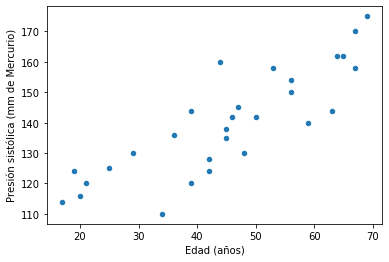

In [219]:
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

In [220]:
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

In [221]:
input_dim = 1
output_dim = 1
modelo = Sequential()

modelo.add(
    Dense(
        output_dim, 
        input_dim=input_dim, 
        activation='linear'
    )
)

In [222]:
#help(modelo.compile)

In [223]:
sgd = SGD(lr=0.0004)
adam = Adam(lr=0.0001)
modelo.compile(loss='mse', optimizer=sgd)

In [224]:
modelo.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [225]:
#help(modelo.fit)

In [226]:
num_epochs = 40000
batch_size = x.shape[0]
batch_size

29

In [227]:
history = modelo.fit(
    x, y, 
    epochs=num_epochs, 
    batch_size=batch_size,
    shuffle=True,
    verbose=0
)#    validation_split=0.1,

In [228]:
train_loss = history.history.get('loss')
val_loss   = history.history.get('val_loss')
train_acc  = history.history.get('acc')
val_acc    = history.history.get('val_acc')

if train_loss:
    print('train_loss: ', train_loss[-1])
if val_loss:
    print('train_loss: ', val_loss[-1])
if train_acc:
    print('train_loss: ', train_acc[-1])
if val_acc:
    print('train_loss: ', val_acc[-1])

train_loss:  86.46695709228516


In [229]:
#help(history)

In [230]:
#help(modelo)

In [231]:
capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

Parámetros: w = 1.0, b = 93.5


Text(0.5, 1.0, 'ECM vs. epochs')

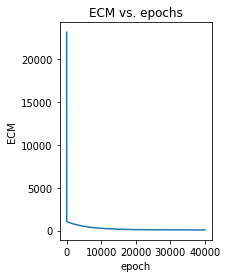

In [232]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

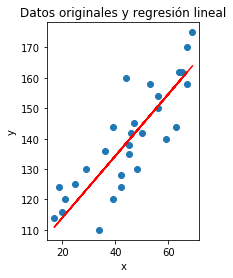

In [233]:
y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()

In [234]:
# Predicción
x_pred = np.array([90])
y_pred = modelo.predict(x_pred)
print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))

La presión sanguínea será de 185.3 mm-Hg  para una persona de 90 años
